In [43]:
import cv2
import matplotlib.pyplot as plt

(555, 695)


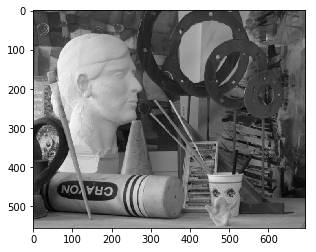

In [44]:
input_image = cv2.imread('input.tif',0)
print (input_image.shape)
plt.imshow(input_image,cmap = 'gray')
plt.show()

In [45]:
import time
start_time = time.time()
sobelx = cv2.Sobel(input_image,cv2.CV_64F,1,0,ksize=3)
stop_time = time.time()
sw_exec_time = stop_time-start_time
print('Software execution time: ',sw_exec_time)

Software execution time:  0.0340425968170166


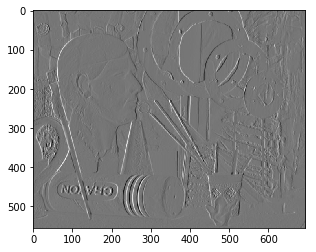

In [46]:
plt.imshow(sobelx,cmap = 'gray')
plt.show()

In [47]:
from pynq import Overlay
import pynq.lib.dma

# Load the overlay
overlay = Overlay('/home/xilinx/pynq/overlays/sobel/filter.bit')

In [48]:
# Load the SobelX DMA
dma = overlay.axi_dma_0

Hardware execution time:  0.00562286376953125


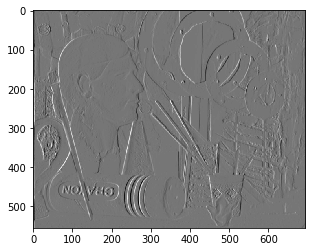

In [49]:
from pynq import Xlnk
import numpy as np
# Allocate buffers for the input and output signals
xlnk = Xlnk()
in_buffer  = xlnk.cma_array(shape=(555*695,), dtype=np.uint32)
out_buffer = xlnk.cma_array(shape=(555*695,), dtype=np.uint32)

# Copy the input_image to the in_buffer
input_image_reshape = np.reshape(input_image,555*695)
np.copyto(in_buffer,input_image_reshape)

# Trigger the DMA transfer and wait for the result
#import time
start_time = time.time()
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
stop_time = time.time()
hw_exec_time = stop_time-start_time
print('Hardware execution time: ',hw_exec_time)

out_buffer_reshape = np.reshape(out_buffer,(555,695))
plt.imshow(out_buffer_reshape,cmap = 'gray')
plt.show()